1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# Cargar librerías necesarias para análisis de datos
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as mpm

# Cargar librerías para regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Lectura de la datasets y cargar en la variable Archivo

Date = pd.read_csv('C:/Users/Secretaria Gobierno/Desktop/UNAD/ANALISIS DE DATOS/Tarea 3/car data.csv')

In [8]:
# Realizamos la lectura del archivo para ver el analisis de exploratorio 

Date.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [10]:
# Ahora verificamos si el archivo se cargo bien y para saber cuántos datos tiene.
print(Date.shape)

(301, 9)


In [12]:
Date.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
Date.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

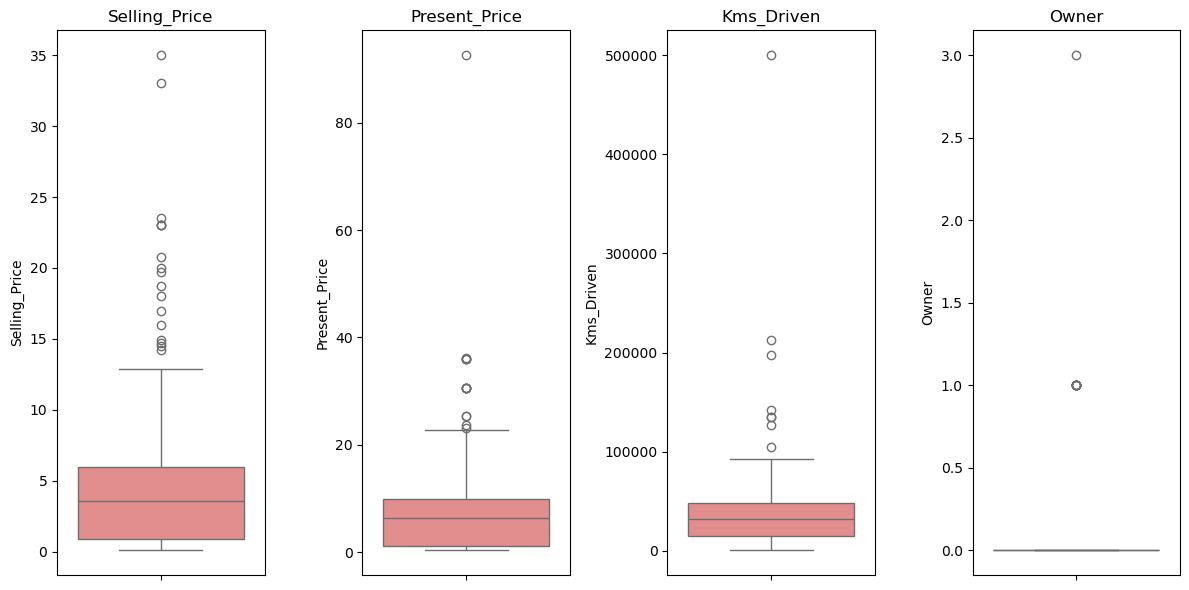

In [16]:
# Se identifican valores atipicos
import matplotlib.pyplot as mpm
import seaborn as sbn

# Lista de variables numéricas relevantes
variables = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Tamaño de la figura
mpm.figure(figsize=(12, 6))

# Dibujar un boxplot por variable
for i, var in enumerate(variables):
    mpm.subplot(1, 4, i+1)
    sbn.boxplot(y=Date[var], color='lightcoral')
    mpm.title(var)

mpm.tight_layout()
mpm.show()


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [28]:
# Verificar si hay valores faltantes
Date.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
# Crear una copia limpia del dataset
datos_limpios = Date.copy()

# Eliminar outliers extremos (top 1%) en Present_Price y Kms_Driven
for col in ['Present_Price', 'Kms_Driven']:
    p99 = datos_limpios[col].quantile(0.99)
    datos_limpios = datos_limpios[datos_limpios[col] < p99]


In [ ]:
# Codificación de variables categóricas
datos_limpios = pd.get_dummies(datos_limpios, drop_first=True)


In [53]:
datos_limpios.head()
datos_limpios.info()


<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 300
Columns: 105 entries, Selling_Price to Car_Age
dtypes: bool(100), float64(2), int64(3)
memory usage: 42.3 KB


In [43]:
#Revision del tipos de datos y datos 
Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
Date['Car_Age'] = 2025 - Date['Year']
Date.drop(['Year'], axis=1, inplace=True)


In [47]:
Date = pd.get_dummies(Date, drop_first=True)


In [49]:
#Revision del tipos de datos y datos 
Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Selling_Price to Transmission_Manual
dtypes: bool(101), float64(2), int64(3)
memory usage: 41.6 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [58]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = Date.drop('Selling_Price', axis=1)
y = Date['Selling_Price']


In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

# Aplicar SelectKBest con f_regression
selector = SelectKBest(score_func=f_regression, k=10)  # elige las 10 mejores

X_nuevo = selector.fit_transform(X, y)

# Ver las columnas seleccionadas
mas_relevantes = selector.get_support(indices=True)
columnas_seleccionadas = X.columns[mas_relevantes]

print("Las variables más relevantes son:\n", columnas_seleccionadas)


Las variables más relevantes son:
 Index(['Present_Price', 'Car_Age', 'Car_Name_city', 'Car_Name_fortuner',
       'Car_Name_innova', 'Car_Name_land cruiser', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


De este resultado podemos deducir que tanto el precio original, la edad del auto y ciertos modelos de auto específicos como fortuner, innova y land cruiser junto con tipo de combustible, tipo de vendedor y tipo de transmisión influyen fuertemente en el valor de reventa. 

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [64]:
# Variables predictoras y objetivo
X = Date.drop('Selling_Price', axis=1)
y = Date['Selling_Price']

# División en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
print (X_train)

     Present_Price  Kms_Driven  Owner  Car_Age  Car_Name_Activa 3g  \
184          0.750       26000      1       17               False   
132          0.950        3500      0        8               False   
194          0.787       50000      0       17               False   
75           6.800       36000      0       10               False   
111          1.500        8700      0        9               False   
..             ...         ...    ...      ...                 ...   
188          0.570       18000      0       12               False   
71          12.480       45000      0       14               False   
106          3.450       16500      1       11               False   
270         10.000       69341      0       14               False   
102          1.780        4000      0        8               False   

     Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
184               False                   False                       False   
1

In [68]:
print (X_test)

     Present_Price  Kms_Driven  Owner  Car_Age  Car_Name_Activa 3g  \
177           0.57       24000      0        9               False   
289          13.60       10980      0        9               False   
228           9.40       60000      0       13               False   
198           0.57       35000      1       14               False   
60           18.61       40001      0       12               False   
..             ...         ...    ...      ...                 ...   
234           5.70        4492      0       10               False   
296          11.60       33988      0        9               False   
281           7.60       50456      0       19               False   
285           8.50       15059      0        9               False   
182           0.58       30000      0       12               False   

     Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
177               False                   False                       False   
2

5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [73]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
modelo = LinearRegression(
    fit_intercept=True,  
    n_jobs=None         
)
modelo.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = modelo.predict(X_test)


In [79]:
print(y_pred)


[ 7.46161148  9.59312092  5.50516683 -0.4095819   8.56493036  6.89302323
  1.47689194  6.23380306  0.98105956  6.69330853 15.6542544   0.29480718
  7.9731867   8.07110527  6.1290099   2.70033242  2.72446736 10.99660213
  7.76950533  8.56468642  5.55055585  7.63116983  5.58411096  1.8831557
  6.25188614  3.48616076  5.48032703  1.59963827  2.68179458  2.67724474
 -0.0339118   9.12867077 -2.33496105  1.98125387  8.36949291  3.99084948
  6.09525948  6.17794581  4.28193757  6.75086878  5.49957398  8.35988776
  3.67337038  0.2586008  13.08330184  0.04469645  8.34787059  9.56050728
  3.9023379   4.04126191  5.84908401  2.70147499 22.94469896 20.62101035
  7.24440658  9.83565807  4.59009615  8.92107953  0.03878204  6.61690799
  3.67195876]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

# Evaluación del modelo
print("R² Score:", r2_score(y_test, y_pred))
print("MSE (Error cuadrático medio):", mean_squared_error(y_test, y_pred))
print("RMSE (Raíz del error cuadrático medio):", root_mean_squared_error(y_test, y_pred))
print("MAE (Error absoluto medio):", mean_absolute_error(y_test, y_pred))


R² Score: 0.5995038184052217
MSE (Error cuadrático medio): 9.225663641180024
RMSE (Raíz del error cuadrático medio): 3.03737775740523
MAE (Error absoluto medio): 2.0349434490285523


In [86]:
# Implementación de otro modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Crear el modelo
modelo_rf = RandomForestRegressor(
    n_estimators=100,      # Número de árboles
    random_state=42,       
    max_depth=None         
)

# Entrenar
modelo_rf.fit(X_train, y_train)

# Predecir
y_pred_rf = modelo_rf.predict(X_test)


In [92]:
# Evaluación del modelo
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R² Score: 0.9647790162085207
MSE: 0.8113359490163939
RMSE: 0.9007418881213385
MAE: 0.6237360655737707


La implementación del modelo Random Forest es mas preciso. por lo que los datos obtenidos se pueden analizar de la siguiente manera: 
R² Score = 0.96 → explica el 96% de la variabilidad de los precios.
RMSE ≈ 0.90 → el error promedio es menos de 1.
MAE ≈ 0.62 → en promedio, se desvía 0.62 del valor real.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

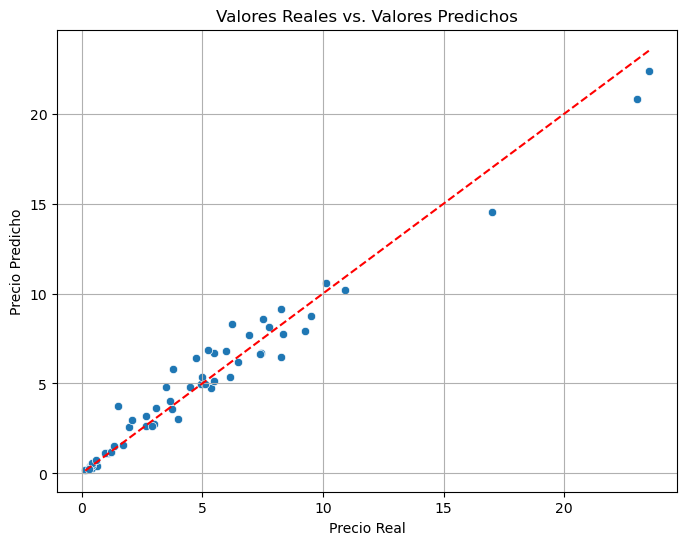

In [96]:
#Grafica de valores Rreales vs Predichos.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Valores Reales vs. Valores Predichos')
plt.grid(True)
plt.show()


De la grafica dada se puede decir que, la linea roja representa la linea ideal donde los valores predichos serían exactamente iguales a los valores reales. 
Los puntos azules las predicciones que están muy cerca de la linea roja lo que nos indica una buena predicción. 
Se puede ver que la mayoria de los puntos están alineados a lo largo de esa línea, lo que confirma el alto R² (0.96) y el bajo error (RMSE ≈ 0.9) que se obtuvo antes. 

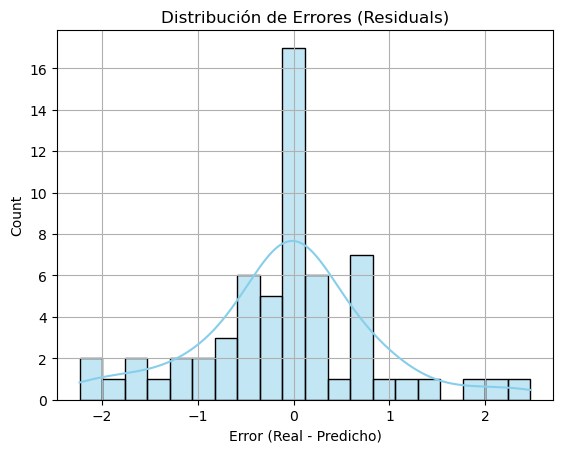

In [99]:
#Grafico de distribución de errores
errores = y_test - y_pred_rf
sns.histplot(errores, kde=True, bins=20, color='skyblue')
plt.title('Distribución de Errores (Residuals)')
plt.xlabel('Error (Real - Predicho)')
plt.grid(True)
plt.show()


De la grafica podemos decir que la mayoria de errores están cerca de cero, lo cual indica que el modelo no comete errores grandes con frecuencia. 

8. Interpretar, analizar y documentar los resultados obtenidos.

El presente análisis tuvo como objetivo principal predecir el precio de autos usados mediante el entrenamiento y evaluación de distintos modelos de regresión utilizando un conjunto de datos con características relevantes de los vehículos.

Inicialmente se aplicó un modelo de Regresión Lineal, el cual ofreció una predicción aceptable con un R² de 0.599, pero presentó errores moderados en sus predicciones, lo que indicaba que no captaba completamente la complejidad no lineal de las relaciones entre variables como el precio original del vehículo, su edad o el tipo de combustible.

Posteriormente se implementó un modelo de Random Forest Regressor, el cual superó ampliamente al anterior, alcanzando un R² de 0.965, con errores significativamente menores (MAE de 0.62 y RMSE de 0.90). Esto confirma que el modelo logra capturar de manera precisa la relación entre las características del vehículo y su valor en el mercado de autos usados.

Las visualizaciones desarrolladas, como la comparación entre valores reales y predichos, así como la distribución de errores, apoyan esta conclusión al mostrar una alineación adecuada y una dispersión de errores centrada alrededor del valor 0.

En resumen, el modelo construido, particularmente con Random Forest, es altamente efectivo y confiable para estimar precios de venta de autos.